In [1]:
import pandas as pd
import os
import re
import numpy as np
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('AGGREGATED_DATA_mobile_developer_barcelona.csv')

In [4]:
df.shape

(4544, 16)

In [5]:
df.isna().sum()

Unnamed: 0                                  0
company_name                                0
position                                    0
location                                    0
url                                         0
date_posted                                 0
Number of applicants                      492
full-time/part-time                      2522
seniority level                          3610
employees                                   0
descriptions                                0
industry                                  638
top competitive skills                      0
Hiring Trend Company Wide                3382
Hiring Trend Company Wide-Engineering    3404
Median Tenure                            3382
dtype: int64

In [6]:
df['seniority level'].value_counts()

associate    884
director      50
Name: seniority level, dtype: int64

In [7]:
df = df.drop('Unnamed: 0', axis=1)

In [8]:
df.columns

Index(['company_name', 'position', 'location', 'url', 'date_posted',
       'Number of applicants', 'full-time/part-time', 'seniority level',
       'employees', 'descriptions', 'industry', 'top competitive skills',
       'Hiring Trend Company Wide', 'Hiring Trend Company Wide-Engineering',
       'Median Tenure'],
      dtype='object')

In [9]:
pd.DataFrame(df['position'].value_counts()).reset_index()

,index,position
0,senior software engineer,118
1,ios developer,86
2,android developer,78
3,software development engineer,48
4,senior ios developer,44
5,software engineer,40
6,senior frontend developer,36
7,senior android developer,34
8,frontend developer,30
9,java developer,30


In [10]:
df['position'] = df['position'].apply(lambda x: x.lower())
df['descriptions'] = df['descriptions'].apply(lambda x: x.lower())

In [11]:
def filter_df(x, y):
    if ('mobile' in x) or ('android' in x) or ('ios' in x) or ('swift' in x) or ('kotlin' in x) :
        return "keep"
    else:
        if ('android' in y) or ('ios' in y) or ('mobile' in y) or ('swift' in y) or ('kotlin' in y):
            return 'keep'
        else:
            return 'remove'     
df['new_filter'] = list(map(filter_df, df['position'], df['descriptions']))

In [12]:
remove = df[df['new_filter']=='remove'].reset_index(drop=True)

In [13]:
df = df[df['new_filter']=='keep'].reset_index(drop=True)
df = df.drop(['new_filter'], axis=1)

In [14]:
df.shape

(2778, 15)

# Total Job Postings by Time Frames

In [15]:
def dates_posted_to_time_frames(x):
    if ('hour' in x) or ('minute' in x):
        return 'within 1 week'
    try:
        num = int(re.findall('\d+', x)[0])
    except TypeError:
        return np.NaN
    if 'week' in x:
        if num == 1:
            return 'within 1 week'
        elif num == 2:
            return 'Between 1 and 2 weeks'
        elif num == 3:
            return 'Between 2 and 3 weeks'
        else:
            return "More than 3 weeks" 
    else:
        return "More than 3 weeks"        
df['time_frames'] = list(map(dates_posted_to_time_frames, df['date_posted']))
# df['time_frames'].value_counts()

In [16]:
temp = pd.DataFrame(df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
temp

,time_frames,number of postings
0,More than 3 weeks,1390
1,within 1 week,728
2,Between 1 and 2 weeks,398
3,Between 2 and 3 weeks,262


In [17]:
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]

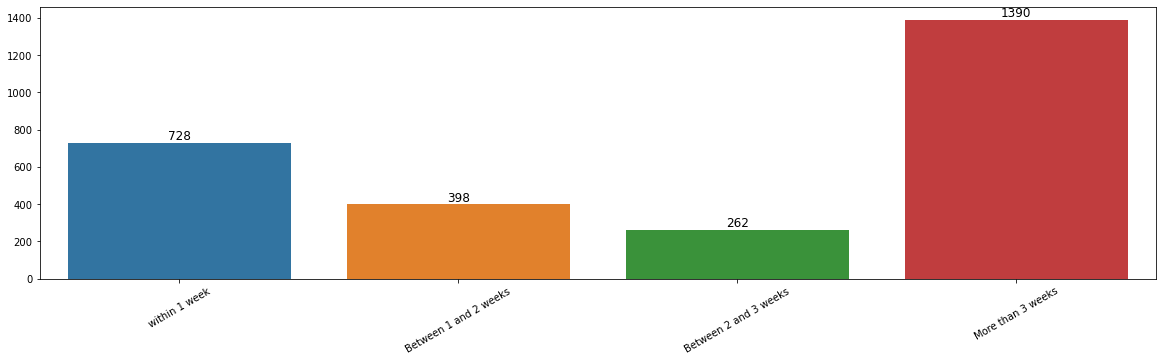

In [18]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [19]:
df_within_1_week = df[df['time_frames'] == 'within 1 week']

In [20]:
df_within_1_month = df[(df['time_frames'].isin(['within 1 week', 'Between 1 and 2 weeks', 'Between 2 and 3 weeks'])) |
                       (df['date_posted'] == '1 month ago')]

# Seniority Level Segments

junior/entry level    1464
associate/senior      1264
Name: seniority_segment_created, dtype: int64
            Seniority  number of postings
0  junior/entry level                1464
1    associate/senior                1264


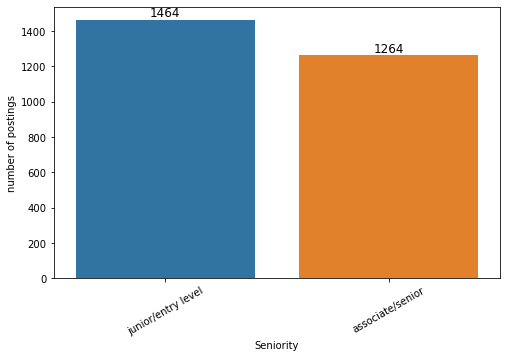

In [21]:
def segment_seniority_levels(x, y):
    if pd.isna(y):
        if ('senior' in x) or ('lead' in x) or ('sr ' in x) or ('director' in x) or ('manager' in x):
            return 'associate/senior'
        else:
            return 'junior/entry level'
    elif y == 'associate':
        return 'associate/senior'
df['seniority_segment_created'] = list(map(segment_seniority_levels, df['position'],df['seniority level']))
print(df['seniority_segment_created'].value_counts())

temp = pd.DataFrame(df['seniority_segment_created'].value_counts()).reset_index()
temp.columns =['Seniority', 'number of postings']
print(temp)

fig, ax = plt.subplots(figsize= (8,5))
ax = sns.barplot(x="Seniority", y="number of postings", data=temp)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [22]:
junior_level_df = df[df['seniority_segment_created']=='junior/entry level']
print(junior_level_df.shape)
senior_level_df = df[df['seniority_segment_created']=='associate/senior']
print(senior_level_df.shape)

(1464, 17)
(1264, 17)


# Junior Level job postings by Time Frames 

In [23]:
temp = pd.DataFrame(junior_level_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
temp

,time_frames,number of postings
0,More than 3 weeks,748
1,within 1 week,370
2,Between 1 and 2 weeks,182
3,Between 2 and 3 weeks,164


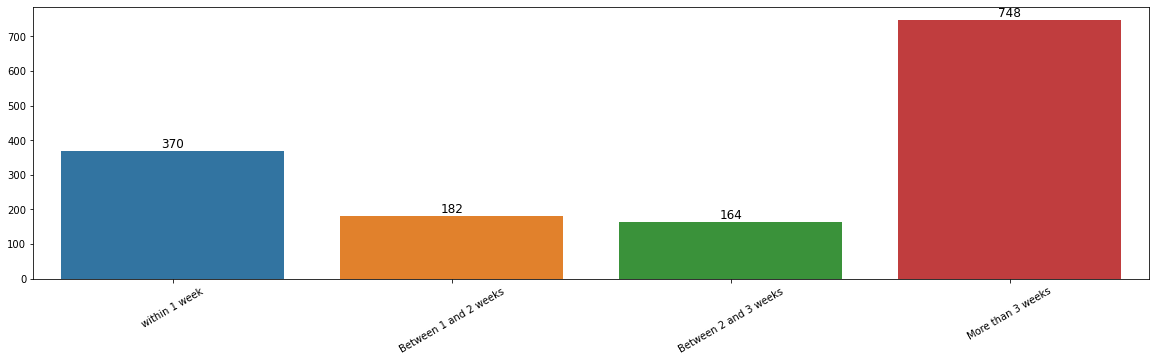

In [24]:
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Companies Hiring

In [25]:
temp = pd.DataFrame(df['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
temp.head(30)

,company_name,number of postings
0,glovo,100
1,king,92
2,page personnel,82
3,picsart,74
4,agoda,72
5,between technology,64
6,adevinta,50
7,scopely,44
8,zendesk,44
9,inetum,44


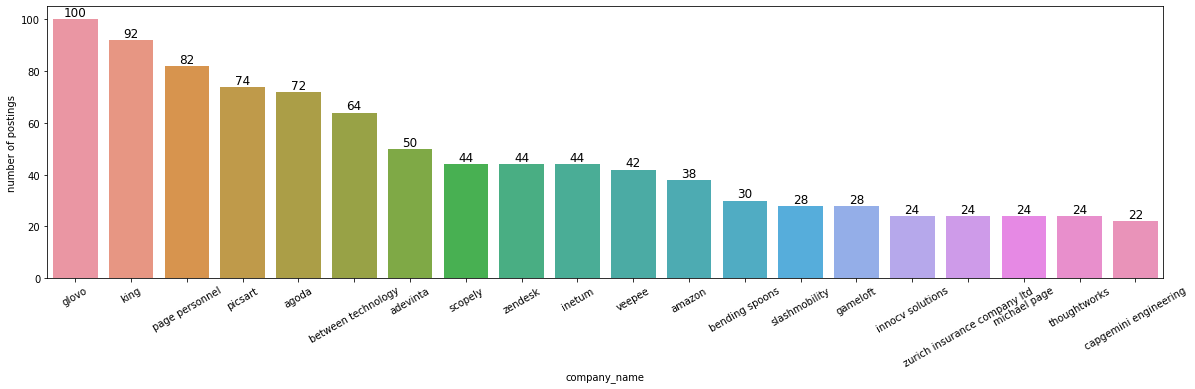

In [26]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# top companies hiring within 1 week

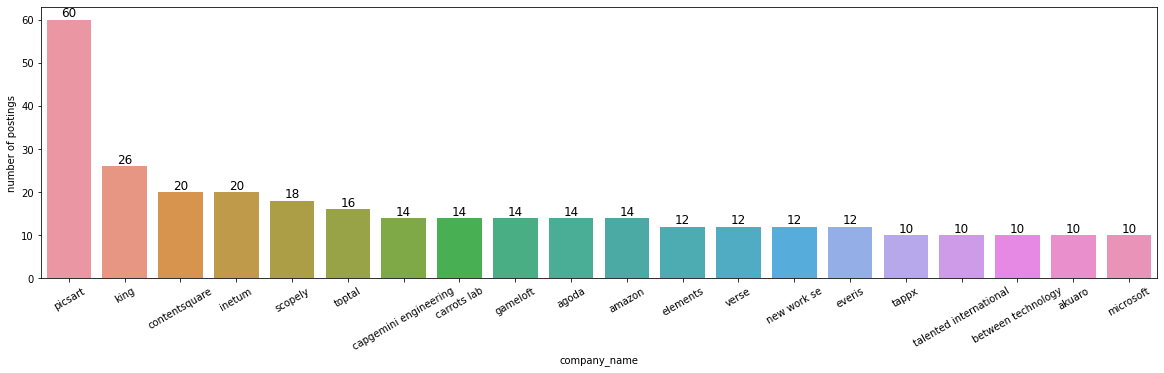

In [27]:
temp = pd.DataFrame(df_within_1_week['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# top companies hiring within 1 month

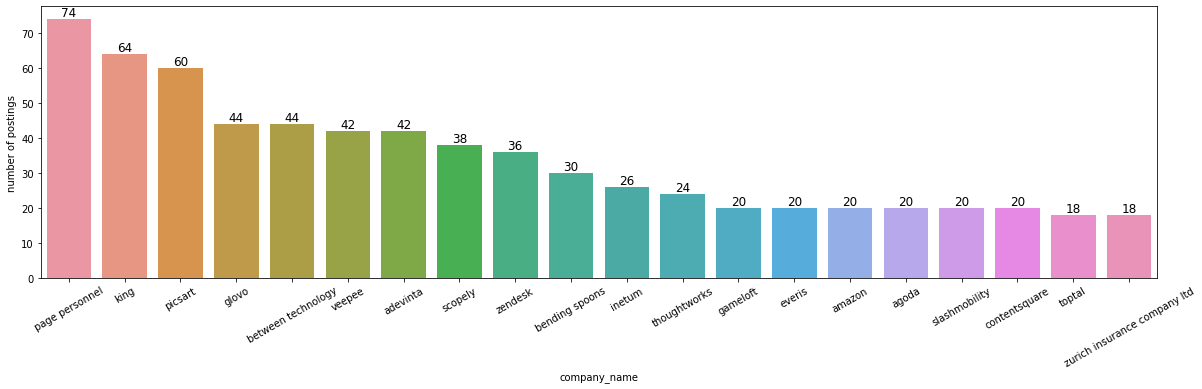

In [28]:
temp = pd.DataFrame(df_within_1_month['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Companies hiring only for junior positions

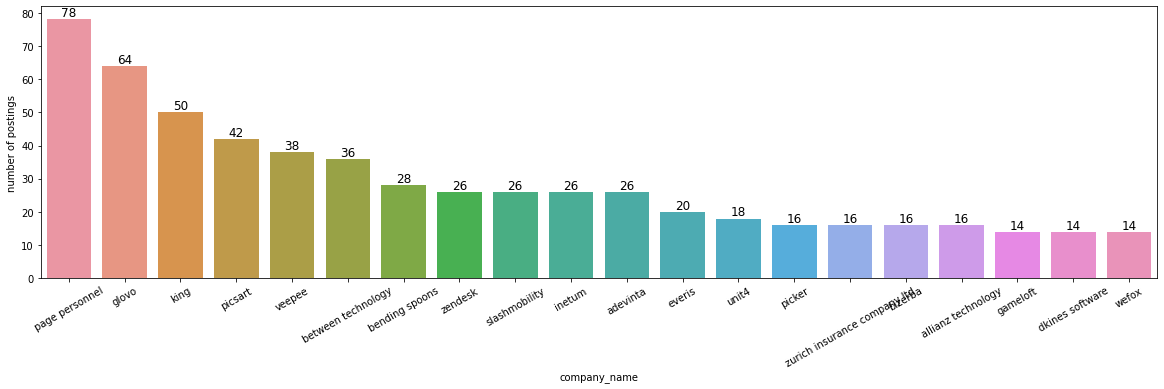

In [29]:
temp = pd.DataFrame(junior_level_df['company_name'].value_counts()).reset_index()
temp.columns =['company_name', 'number of postings']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=temp.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions Overall

In [30]:
top_positions = pd.DataFrame(df['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
top_positions

,position,count
0,ios developer,86
1,android developer,78
2,senior ios developer,44
3,senior android developer,34
4,senior software engineer,30
5,android engineer,24
6,android engineer remote or relocate,22
7,programador full stack,22
8,android developer video,22
9,ios mobile developer,20


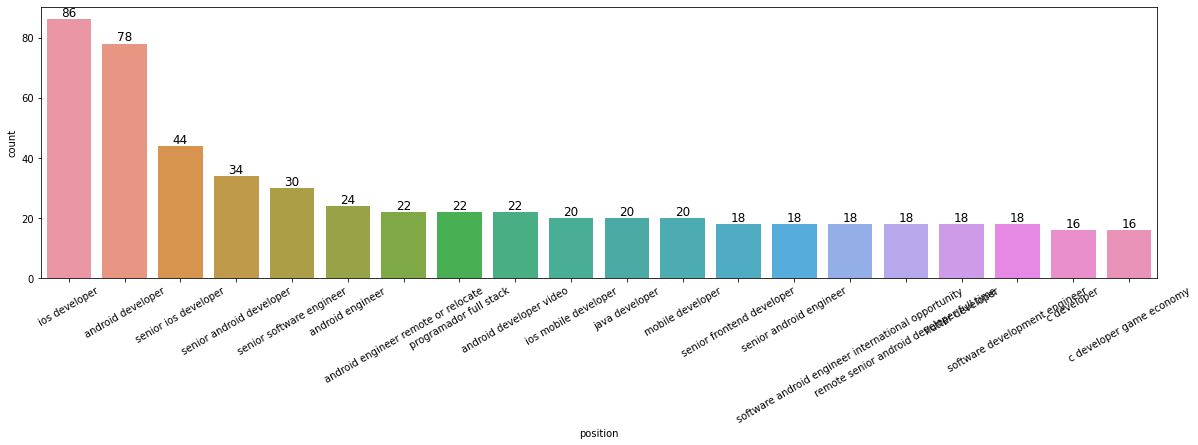

In [31]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions this week

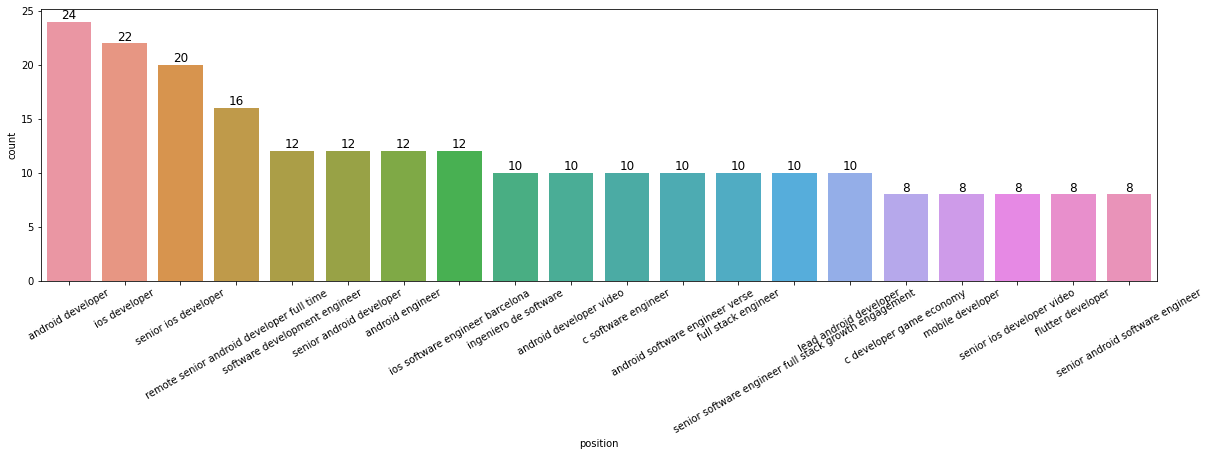

In [32]:
top_positions = pd.DataFrame(df_within_1_week['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions This Month

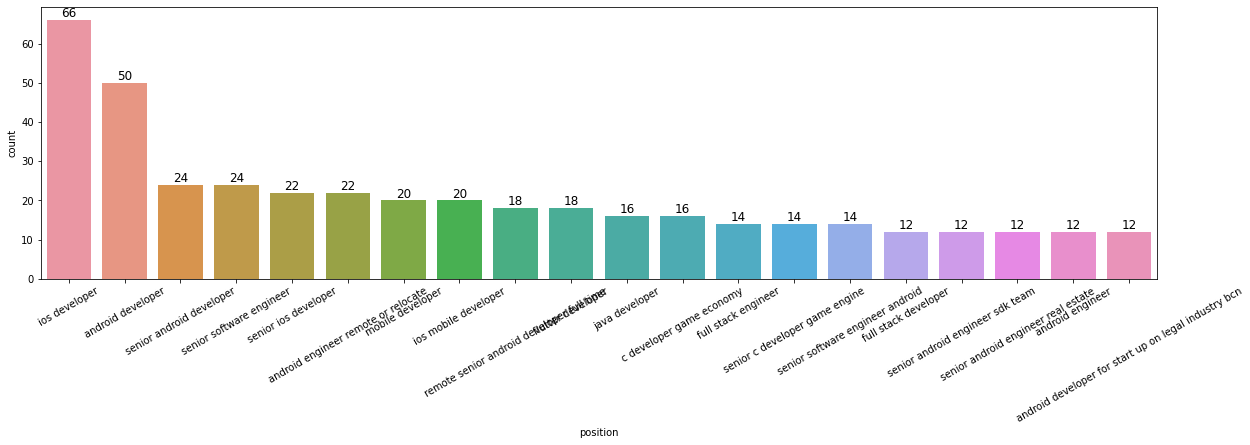

In [33]:
top_positions = pd.DataFrame(df_within_1_month['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Positions For Junior/Entry Level Roles

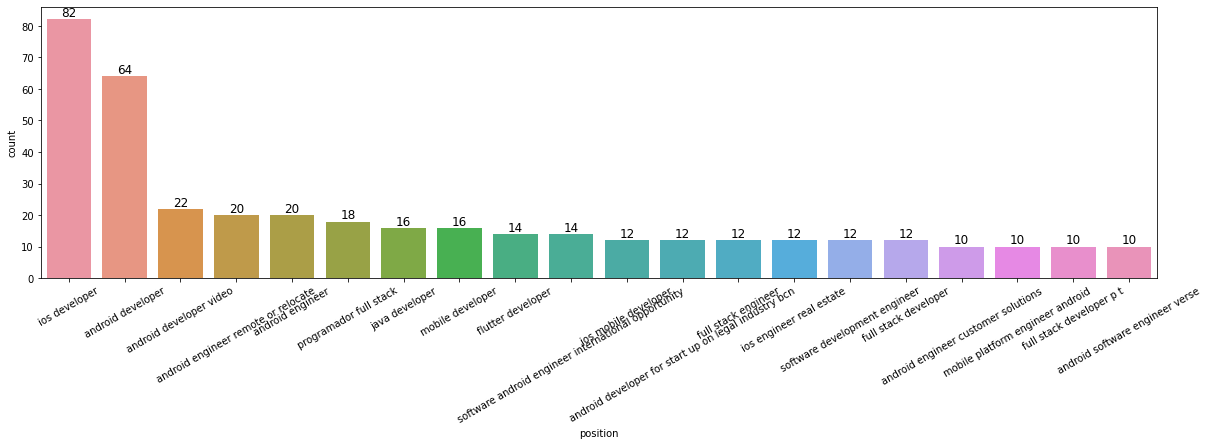

In [34]:
top_positions = pd.DataFrame(junior_level_df['position'].value_counts()).reset_index()
top_positions.columns = ['position', 'count']
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="position", y="count", data=top_positions.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [35]:
top_skills = []
for row_content in df['top competitive skills']:
    row_content = row_content.replace('/', ' ').replace('-', ' ')
    if len(row_content) > 3:
        try:
            for item in re.findall('\w+ \w+ \w+', row_content):  # Skills with 3 words
                top_skills.append(item)
            for item in re.findall('\w+ \w+', row_content):  # Skills with 2 words
                top_skills.append(item)
            for item in re.findall('\'\w+\'', row_content):  # Skill with single word
                top_skills.append(re.findall('\w+', item)[0])
        except TypeError:
            pass

top_skills = [item.lower() for item in top_skills]

In [36]:
# len(top_skills)
# ios_skill = []
# for item in top_skills:
#     if 'ios' in item:
#         ios_skill.append(item)
# ios_skill

In [37]:
def clean_skill(x):
    if ('cascading' in x) or ('css' in x):
        return 'css'
    elif 'ios' in x:
        return 'ios'
    elif 'android' in x:
        return 'android'
    elif 'sql' in x:
        return'sql'
    elif 'object oriented' in x:
        return 'object oriented programing'
    elif 'back end' in x:
        return 'back end'
    elif 'front end' in x:
        return 'front end'
    elif ('full stack' in x) or ('fullstack' in x):
        return 'full stack'
    elif 'user interface' in x:
        return 'user interface design'
    elif 'php' in x:
        return 'php'
    elif 'model view' in x:
        return 'model view'
    elif 'programming' in x:
        return 'programming language'
    elif 'azure' in x:
        return 'azure'
    elif 'web design' in x:
        return 'web design'
    elif ('software project' in x) or ('project management' in x):
        return 'project management'
    elif 'java database' in x:
        return 'java database'
    elif 'sap' in x:
        return 'sap'
    elif 'apis' in x:
        return 'apis'
    else:
        return x  

In [38]:
top_skills = pd.Series(top_skills).apply(clean_skill)

# Top Skills of the candidates who applied for the job

In [39]:
x = pd.DataFrame(pd.DataFrame(top_skills).value_counts())
x.columns = ['count']
x = x.reset_index()
x.columns = ['skill', 'count']
x = x[x['count']> 7]
x

,skill,count
0,sql,1152
1,css,622
2,android,610
3,javascript,546
4,programming language,502
5,java,396
6,english,346
7,php,286
8,html,272
9,ios,242


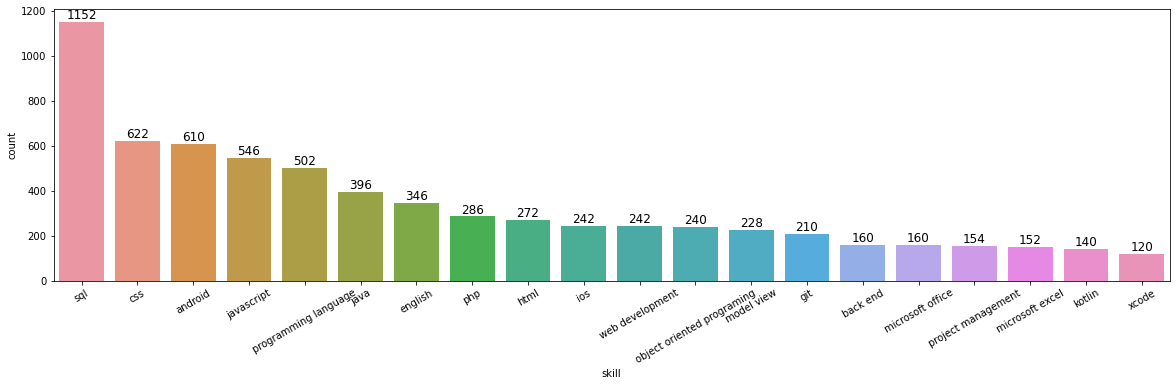

In [40]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=x.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [41]:
skills = x['skill']
skills = list(skills.values)

In [42]:
other_skills = ['swift', 'xamarin', 'appcelerator', 'cordova', 'phonegap', 'buildfire', 'ionic', 'android sdk', 
               'android studio', 'angular', 'objective-c', 'dart', 'lua', 'rust' ,'action script' ,
               'mobile design']

In [43]:
skills = skills + other_skills

# Top Skills Asked by the employers

In [44]:
import re

In [45]:
skills_count = {}
for skill in skills:
    counter = 0
    for description in df['descriptions']:
        if (skill == 'ci') and len(re.findall('ci ', description))>0:
            counter+=1
        elif skill in description:
            counter += 1
    skills_count[skill] = counter

In [46]:
skills_count = pd.DataFrame(dict(sorted(skills_count.items(), key=lambda x: x[1], reverse=True)).items())
skills_count.columns = ['skill', 'count']

In [47]:
skills_count

,skill,count
0,ios,1934
1,software,1666
2,git,1600
3,design,1594
4,java,1456
5,android,1374
6,unity,1374
7,english,1346
8,testing,1002
9,engineering,990


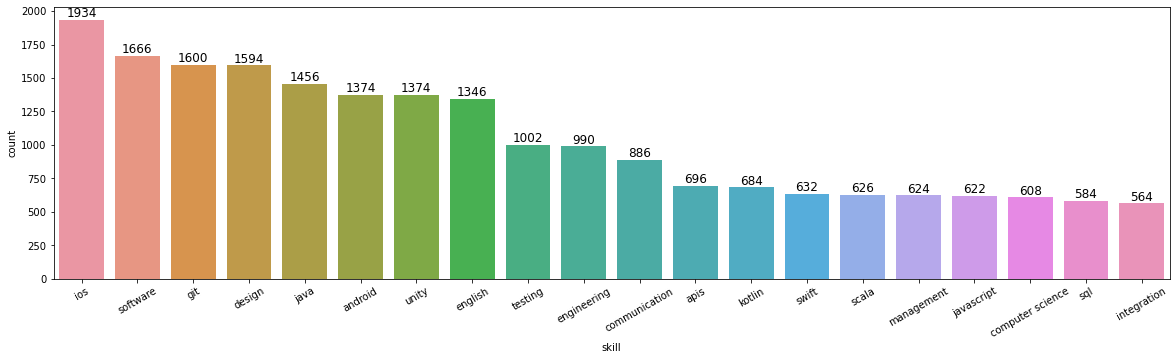

In [48]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top Skills Required by Employers for Junior/Entry Level Positions 

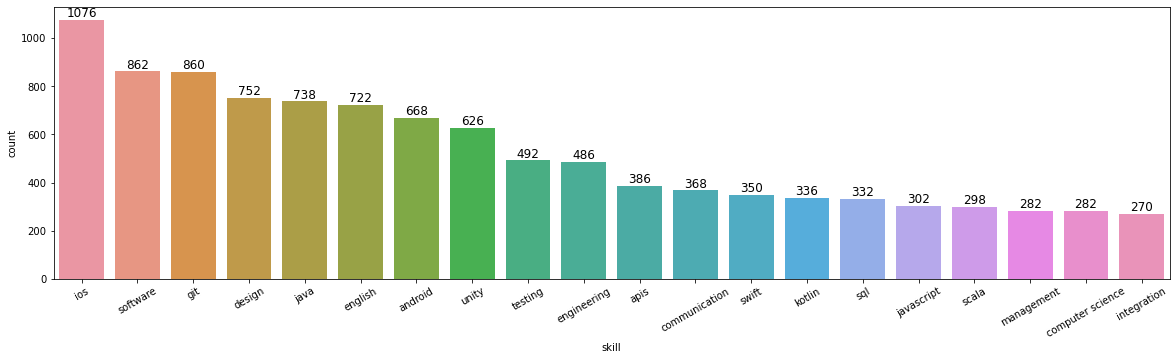

In [49]:
skills_count = {}
for skill in skills:
    counter = 0
    for description in junior_level_df['descriptions']:
        if (skill == 'ci') and len(re.findall('ci ', description))>0:
            counter+=1
        elif skill in description:
            counter += 1
    skills_count[skill] = counter
skills_count = pd.DataFrame(dict(sorted(skills_count.items(), key=lambda x: x[1], reverse=True)).items())
skills_count.columns = ['skill', 'count']
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

In [50]:
## Next analysis : Top skills for iOS jobs and for Android Jobs 

In [51]:
df['position'].value_counts()

ios developer                                                                                                        86
android developer                                                                                                    78
senior ios developer                                                                                                 44
senior android developer                                                                                             34
senior software engineer                                                                                             30
android engineer                                                                                                     24
android engineer remote or relocate                                                                                  22
programador full stack                                                                                               22
android developer video                 

In [52]:
def platform_ios_android(x, y):
    if 'android' in x:
        return "android"
    elif 'kotlin' in x:
        return "android"
    elif 'ios' in x:
        return 'ios'
    elif 'swift' in x:
        return 'ios'
    elif ('android' in y) and ('ios' not in y):
        return 'android'
    elif ('ios' in y) and ('android' not in y):
        return 'ios'
    elif ('swift' in y) and ('kotlin' not in y) and ('android' not in y):
        return 'ios'
    elif ('kotlin' in y) and ('swift' not in y) and ('ios' not in y):
        return 'android'
    else:
        return 'not specified'     
df['platform'] = list(map(platform_ios_android, df['position'], df['descriptions']))

In [53]:
df['platform'].value_counts()

not specified    1056
ios              1002
android           720
Name: platform, dtype: int64

# iOS Analysis

In [54]:
ios_df = df[df['platform']=='ios']
ios_df.shape

(1002, 18)

In [55]:
# ios_df.head()

In [56]:
ios_junior_df = df[(df['platform']=='ios') & (df['seniority_segment_created']=='junior/entry level')]
ios_junior_df.shape

(608, 18)

In [57]:
# ios_junior_df.head()

# IOS JOBS BY TIMEFRAMES

In [58]:
temp = pd.DataFrame(ios_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
temp

,time_frames,number of postings
0,More than 3 weeks,438
1,within 1 week,276
2,Between 2 and 3 weeks,152
3,Between 1 and 2 weeks,136


In [59]:
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]

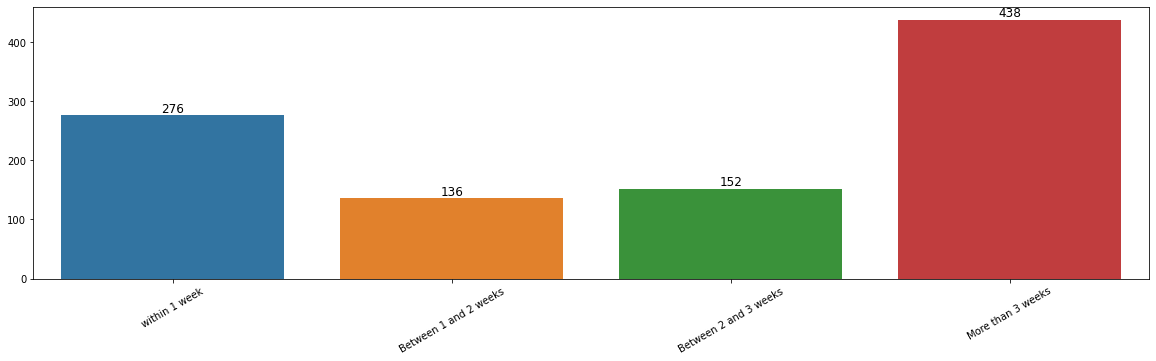

In [60]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# JUNIOR LEVEL IOS JOBS BY TIMEFRAMES

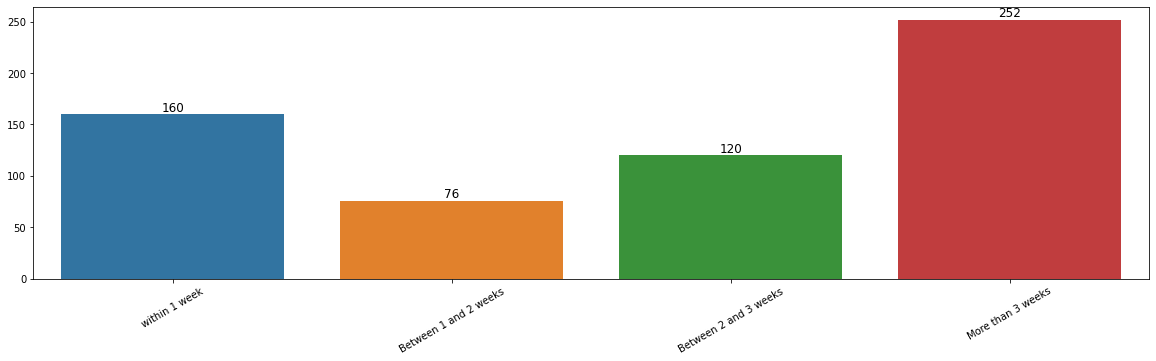

In [61]:
temp = pd.DataFrame(ios_junior_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# SKILLS

In [62]:
skills_count_ios = {}
counter = 0
for skill in skills:
    counter = 0
    for description in ios_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_ios[skill] = counter
skills_count_ios = pd.DataFrame(dict(sorted(skills_count_ios.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_ios.columns = ['skill', 'count']
skills_count_ios = skills_count_ios[skills_count_ios['count']>0]
skills_count_ios

,skill,count
0,ios,986
1,git,570
2,software,534
3,design,438
4,java,430
5,english,372
6,unity,360
7,swift,350
8,testing,332
9,engineering,318


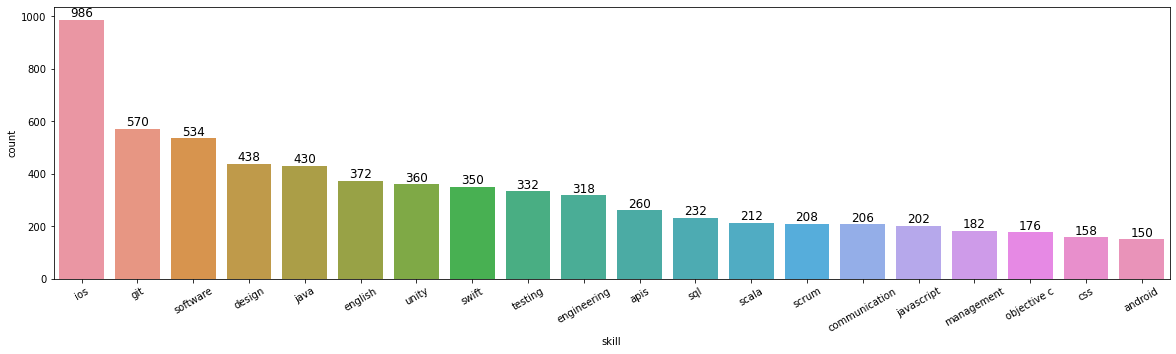

In [63]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

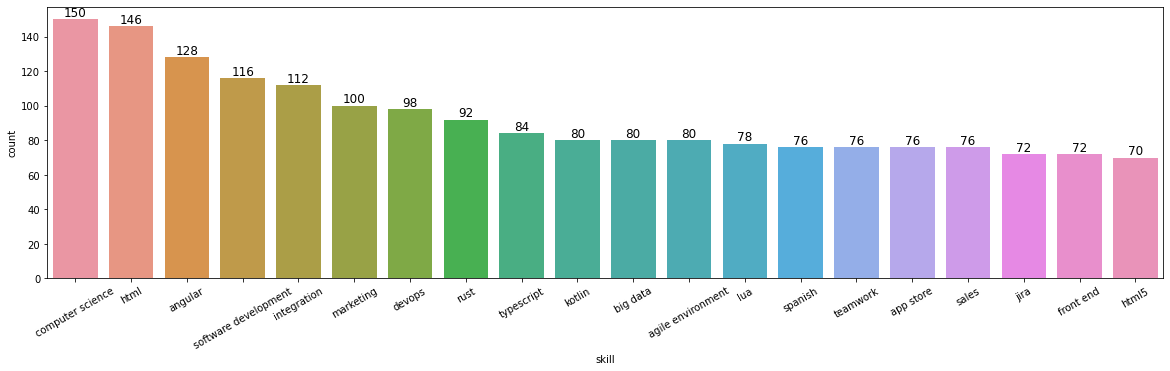

In [64]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.iloc[20:40])
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# JUNIOR LEVEL SKILLS 

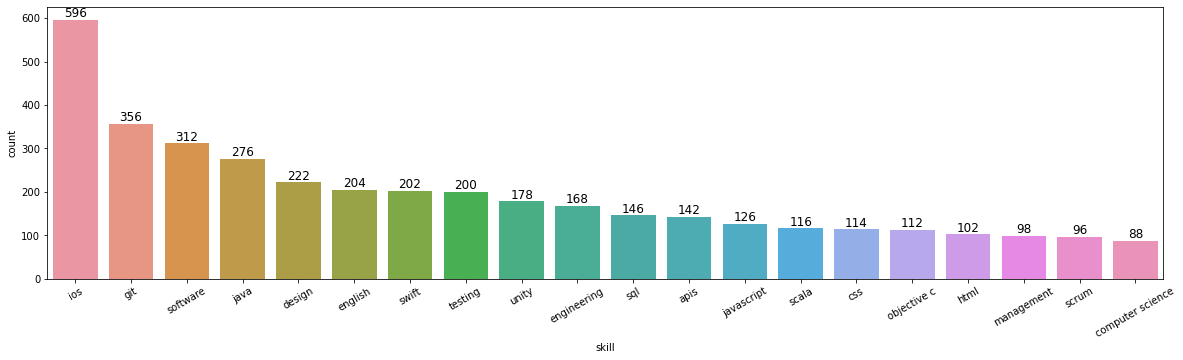

In [65]:
skills_count_ios = {}
counter = 0
for skill in skills:
    counter = 0
    for description in ios_junior_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_ios[skill] = counter
skills_count_ios = pd.DataFrame(dict(sorted(skills_count_ios.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_ios.columns = ['skill', 'count']
skills_count_ios = skills_count_ios[skills_count_ios['count']>0]
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top companies iOS

In [66]:
top_companies_ios = pd.DataFrame(ios_df['company_name'].value_counts()).reset_index()
top_companies_ios.columns =['company_name', 'number of postings']
top_companies_ios

,company_name,number of postings
0,between technology,56
1,page personnel,52
2,king,50
3,glovo,34
4,picsart,28
5,inetum,26
6,adevinta,26
7,veepee,20
8,hays,18
9,scopely,16


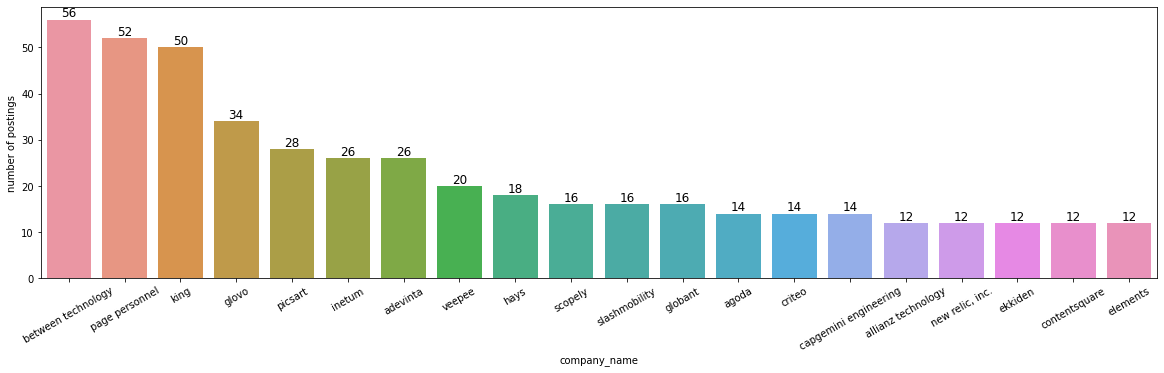

In [67]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# TOP IOS JOB COMPANIES FOR JUNIOR POSITIONS 

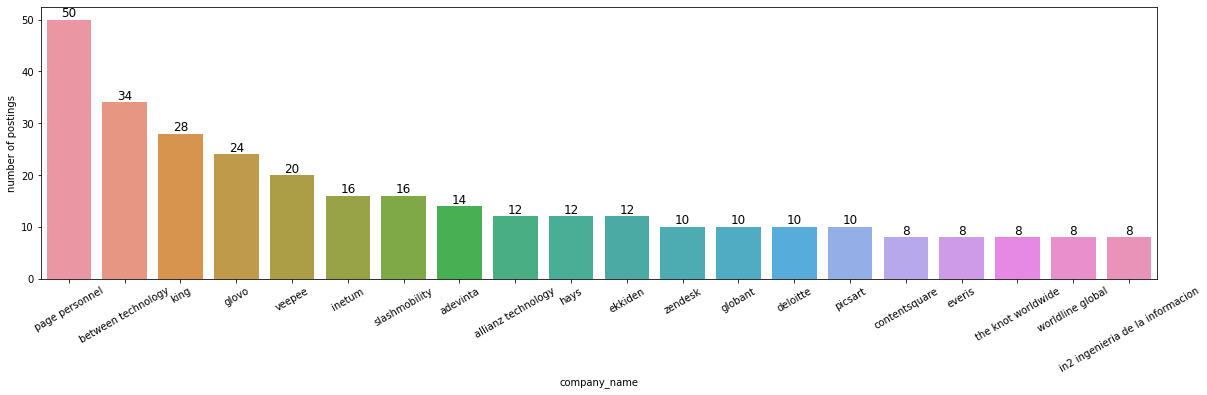

In [68]:
top_companies_ios = pd.DataFrame(ios_junior_df['company_name'].value_counts()).reset_index()
top_companies_ios.columns =['company_name', 'number of postings']
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Android Analysis

In [69]:
android_df = df[df['platform']=='android']
android_df.shape

(720, 18)

In [70]:
android_junior_df = df[(df['platform']=='android') & (df['seniority_segment_created']=='junior/entry level')]
android_junior_df.shape

(358, 18)

# ANDROID JOBS BY TIMEFRAME

In [71]:
temp = pd.DataFrame(android_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
temp

,time_frames,number of postings
0,More than 3 weeks,390
1,within 1 week,194
2,Between 1 and 2 weeks,112
3,Between 2 and 3 weeks,24


In [72]:
a = temp['time_frames'][0]
b = temp['time_frames'][2]
c = temp['time_frames'][3]
d = temp['time_frames'][1]
x = [a,b, c, d]
a = temp['number of postings'][0]
b = temp['number of postings'][2]
c = temp['number of postings'][3]
d = temp['number of postings'][1]
y = [a,b,c,d]

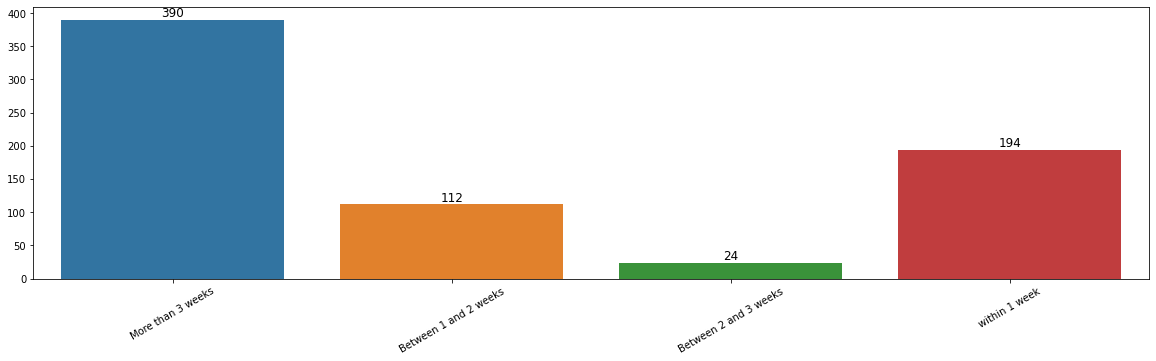

In [73]:
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# JUNIOR LEVEL ANDROID JOBS BY TIME FRAME

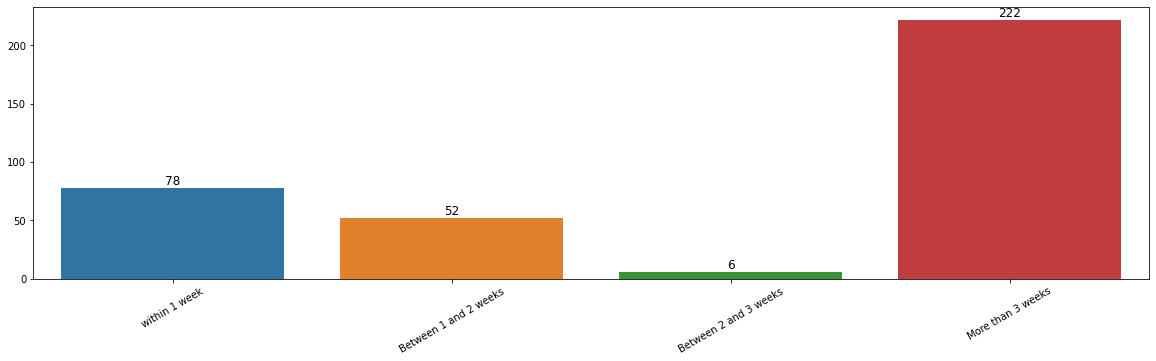

In [74]:
temp = pd.DataFrame(android_junior_df['time_frames'].value_counts()).reset_index()
temp.columns =['time_frames', 'number of postings']
a = 'within 1 week'
b = 'Between 1 and 2 weeks'
c = 'Between 2 and 3 weeks'
d = 'More than 3 weeks'
x = [a,b, c, d]
a = temp[temp['time_frames'] == a]['number of postings'].values[0]
b = temp[temp['time_frames'] == b]['number of postings'].values[0]
c = temp[temp['time_frames'] == c]['number of postings'].values[0]
d = temp[temp['time_frames'] == d]['number of postings'].values[0]
y = [a,b,c,d]
fig, ax = plt.subplots(figsize= (20,5))
ax = sns.barplot(x=x, y=y)
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# ANDROID SKILLS 

In [75]:
skills_count_android = {}
counter = 0
for skill in skills:
    counter = 0
    for description in android_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_android[skill] = counter
skills_count_android = pd.DataFrame(dict(sorted(skills_count_android.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_android.columns = ['skill', 'count']
skills_count_android = skills_count_android[skills_count_android['count']>0]
skills_count_android.head(20)

,skill,count
0,android,656
1,kotlin,498
2,java,484
3,software,482
4,design,474
5,git,448
6,unity,416
7,ios,380
8,english,368
9,engineering,308


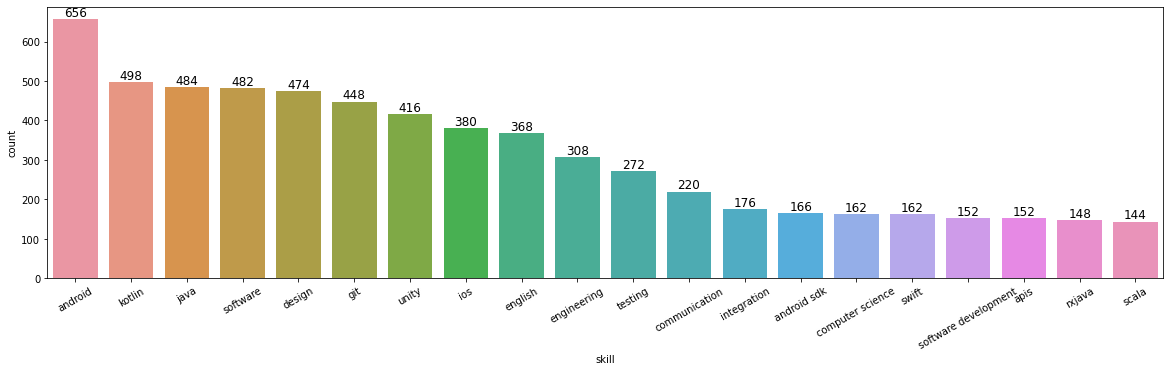

In [76]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_android.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# ANDROID SKILLS FOR JUNIOR POSITIONS 

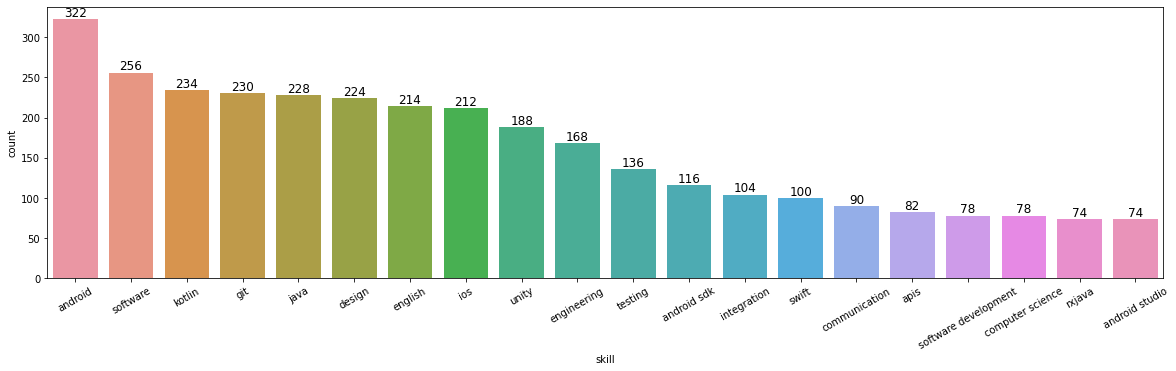

In [77]:
skills_count_ios = {}
counter = 0
for skill in skills:
    counter = 0
    for description in android_junior_df['descriptions']:
        if (skill == 'ci'):
            if len(re.findall('ci ', description))>0:
                counter+=1
        elif skill in description:
            counter += 1
    skills_count_ios[skill] = counter
skills_count_ios = pd.DataFrame(dict(sorted(skills_count_ios.items(), key=lambda x: x[1], reverse=True)).items())
skills_count_ios.columns = ['skill', 'count']
skills_count_ios = skills_count_ios[skills_count_ios['count']>0]
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="skill", y="count", data=skills_count_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# Top companies Android

In [78]:
top_companies_android = pd.DataFrame(android_df['company_name'].value_counts()).reset_index()
top_companies_android.columns =['company_name', 'number of postings']
top_companies_android

,company_name,number of postings
0,glovo,44
1,picsart,42
2,zendesk,28
3,page personnel,22
4,bending spoons,22
5,agoda,22
6,adevinta,20
7,toptal,18
8,dkines software,16
9,veepee,14


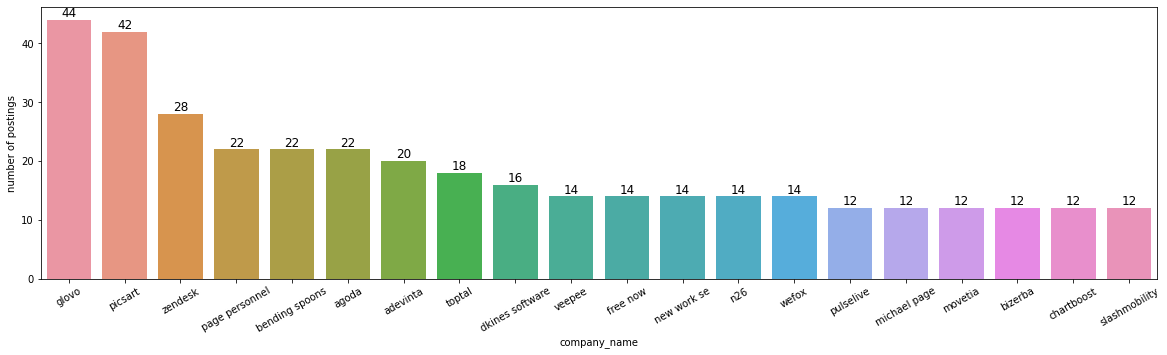

In [79]:
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_android.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()

# TOP COMPANIES ANDROID FOR JUNIOR POSITIONS 

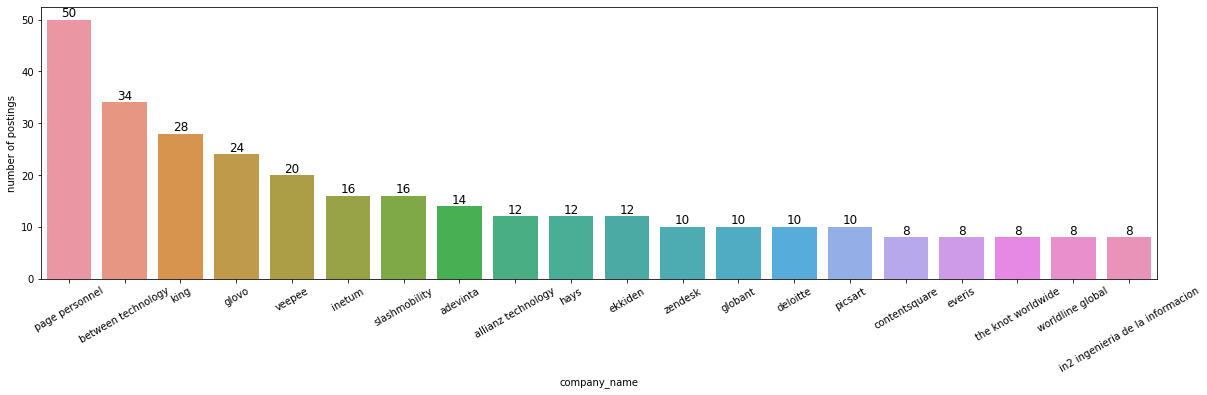

In [80]:
top_companies_android = pd.DataFrame(android_junior_df['company_name'].value_counts()).reset_index()
top_companies_android.columns =['company_name', 'number of postings']
fig = plt.subplots(figsize= (20,5))
ax = sns.barplot(x="company_name", y="number of postings", data=top_companies_ios.head(20))
plt.xticks(rotation=30)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()